In [ ]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
dataset = randn(25)

(0.0, 1.0)

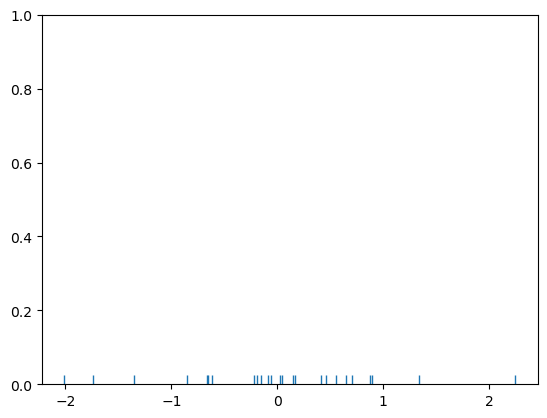

In [ ]:
sns.rugplot(dataset)

plt.ylim(0,1)

<Axes: >

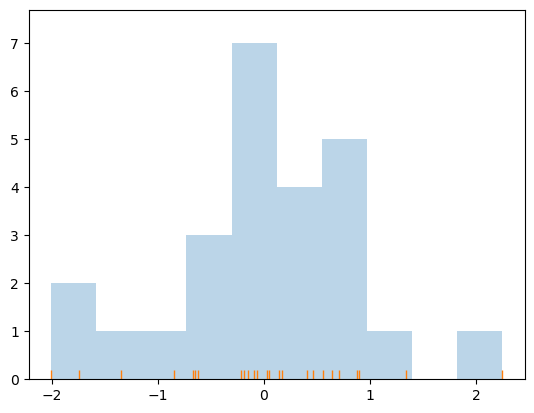

In [ ]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0.0, 1.0)

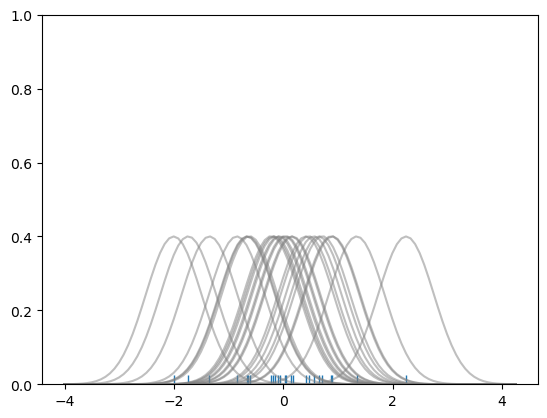

In [ ]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4 * dataset.std()**5)/(3*(len(dataset)))) ** 0.2

kernel_list = []

for data_point in dataset:

    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4

    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)\

plt.ylim(0, 1)

Text(0.5, 0.98, 'Sum of the basis functions')

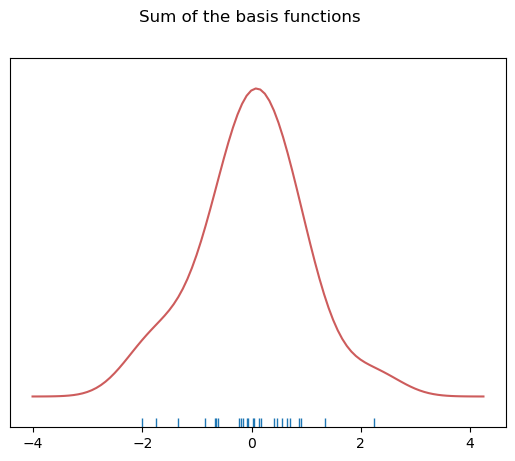

In [ ]:
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

<Axes: ylabel='Density'>

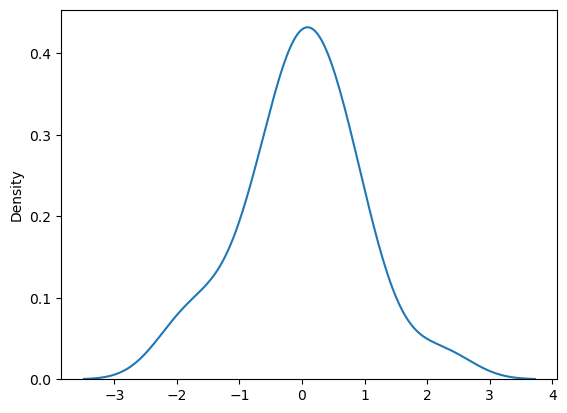

In [ ]:
sns.kdeplot(dataset)

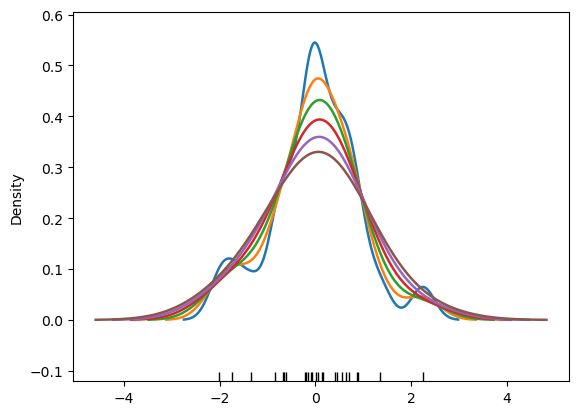

In [ ]:
sns.rugplot(dataset, color = 'black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw_adjust = bw, lw = 1.8, label = bw)

<Axes: ylabel='Density'>

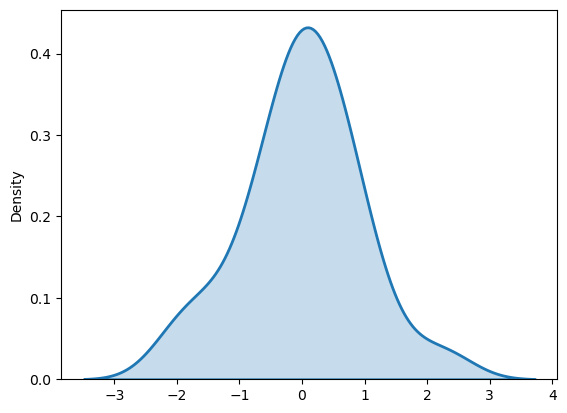

In [ ]:
sns.kdeplot(dataset, label = 'Gaussian KDE', lw=2, fill = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6860\4088684228.py:1: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(dataset, vertical = True)


<Axes: xlabel='Density'>

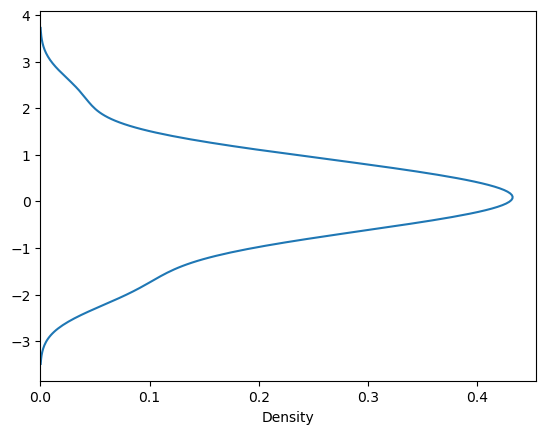

In [ ]:
sns.kdeplot(dataset, vertical = True)

<Axes: ylabel='Density'>

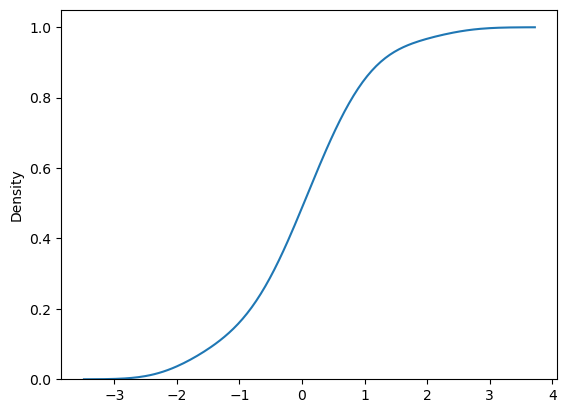

In [ ]:
sns.kdeplot(dataset, cumulative = True)

<Axes: ylabel='Density'>

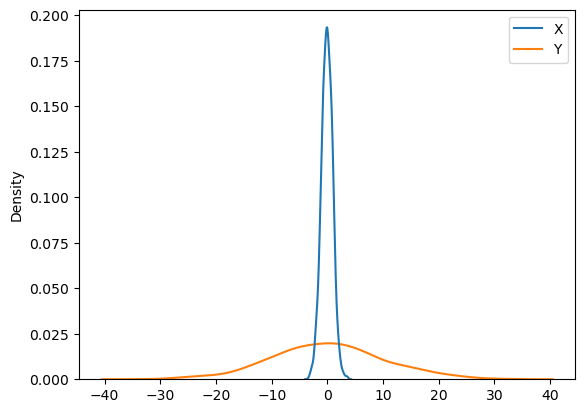

In [ ]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns = ['X','Y'])

sns.kdeplot(dframe)

<Axes: ylabel='Density'>

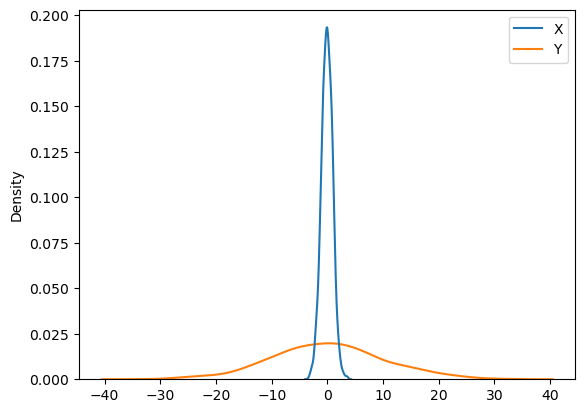

In [ ]:
sns.kdeplot(dframe, bw_adjust=1)

<Axes: ylabel='Density'>

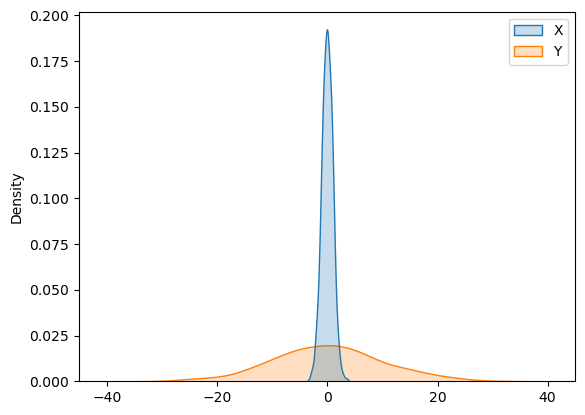

In [ ]:
sns.kdeplot(data = dframe, bw_method = 'silverman', fill=True)

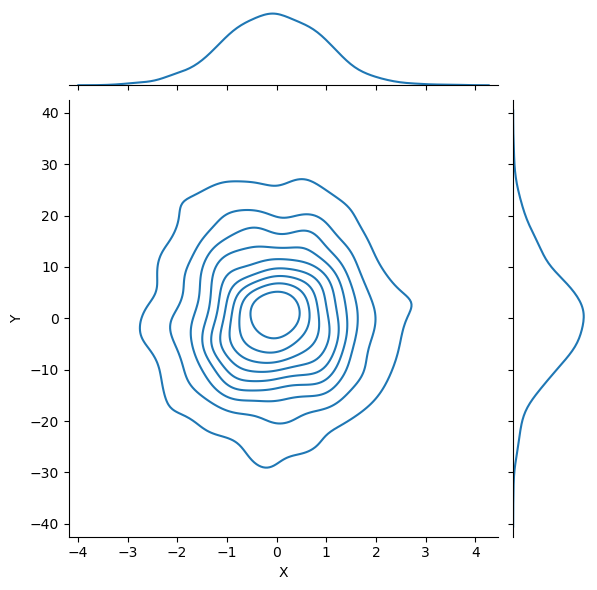

In [ ]:
sns.jointplot(x='X', y='Y', data=dframe, kind = 'kde')